In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
tf.__version__

'2.0.0'

In [4]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [5]:
X_train_full.shape

(60000, 28, 28)

In [6]:
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0

In [34]:
from sklearn.preprocessing import OneHotEncoder
one_hot = OneHotEncoder()
y_train_full_one_hot = one_hot.fit_transform(y_train_full.reshape(-1,1)).toarray()
y_train_full_one_hot.shape
print(y_train_full[0])
print(type(y_train_full_one_hot))

9
<class 'numpy.ndarray'>


/Users/h/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [35]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full,y_train_full_one_hot,test_size = 5000)

In [36]:
X_train.shape
y_train.shape

(55000, 10)

In [37]:
X_valid.shape

(5000, 28, 28)

In [38]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
              "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [44]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(150, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(75, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation='softmax')
])

In [45]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 300)               235500    
_________________________________________________________________
dropout (Dropout)            (None, 300)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 150)               45150     
_________________________________________________________________
dropout_1 (Dropout)          (None, 150)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 75)                11325     
_________________________________________________________________
dropout_2 (Dropout)          (None, 75)               

In [46]:
model.layers[2].name

'dropout'

In [47]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [48]:
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/100
55000/55000 [==============================] - 7s 121us/sample - loss: 0.5905 - accuracy: 0.7889 - val_loss: 0.3895 - val_accuracy: 0.8496
Epoch 2/100
55000/55000 [==============================] - 6s 105us/sample - loss: 0.4346 - accuracy: 0.8427 - val_loss: 0.3691 - val_accuracy: 0.8616
Epoch 3/100
55000/55000 [==============================] - 6s 105us/sample - loss: 0.3973 - accuracy: 0.8582 - val_loss: 0.3344 - val_accuracy: 0.8706
Epoch 4/100
55000/55000 [==============================] - 6s 106us/sample - loss: 0.3716 - accuracy: 0.8667 - val_loss: 0.3550 - val_accuracy: 0.8610
Epoch 5/100
55000/55000 [==============================] - 6s 106us/sample - loss: 0.3544 - accuracy: 0.8698 - val_loss: 0.3219 - val_accuracy: 0.8808
Epoch 6/100
55000/55000 [==============================] - 6s 106us/sample - loss: 0.3417 - accuracy: 0.8757 - val_loss: 0.3175 - val_accuracy: 0.8836
Epoch 7/100
55000/55000 [====================

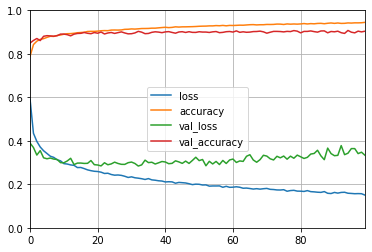

In [51]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot()
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [55]:
y_test_one_hot = one_hot.transform(y_test.reshape(-1,1)).toarray()
model.evaluate(X_test, y_test_one_hot)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.40209058698415756, 0.8968]

In [56]:
y_pred = model.predict(X_test)

In [59]:
import numpy as np
y_pred_argmax = np.argmax(y_pred, axis=1)

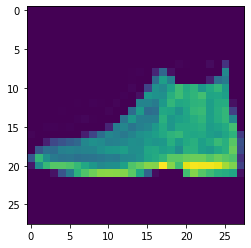

In [62]:
plt.imshow(X_test[0])

In [64]:
class_names[y_pred_argmax[0]]

'Ankle boot'

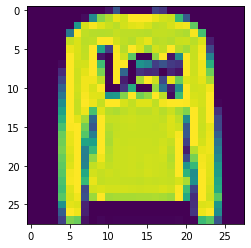

In [65]:
plt.imshow(X_test[1])

In [66]:
class_names[y_pred_argmax[1]]

'Pullover'

In [70]:
from sklearn.metrics import confusion_matrix
confusion_df = pd.DataFrame(confusion_matrix(y_pred=y_pred_argmax, y_true=y_test))

In [71]:
confusion_df.columns = class_names.copy()

In [72]:
confusion_df.index = class_names.copy()

In [73]:
confusion_df

,T-shirt/top,Trouser,Pullover,Dress,Coat,Sandal,Shirt,Sneaker,Bag,Ankle boot
T-shirt/top,879,3,12,22,4,1,76,0,3,0
Trouser,2,986,1,7,2,0,1,0,1,0
Pullover,20,2,823,9,84,0,61,0,1,0
Dress,16,10,8,897,45,0,21,0,3,0
Coat,0,1,88,25,830,0,54,0,2,0
Sandal,0,0,0,0,0,960,0,16,0,24
Shirt,127,2,80,27,63,0,700,0,1,0
Sneaker,0,0,0,0,0,10,0,968,0,22
Bag,6,0,1,4,6,2,6,3,972,0
Ankle boot,0,0,0,0,0,3,1,43,0,953
